In [1]:
# Import dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/Users/yongxingnie/Desktop/data science methods and tools/assignment3/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/yongxingnie/Desktop/data science methods and tools/assignment3/data/.DS_Store
/Users/yongxingnie/Desktop/data science methods and tools/assignment3/data/Breast Cancer Wisconsin Dataset.csv
/Users/yongxingnie/Desktop/data science methods and tools/assignment3/data/IRIS.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data='/Users/yongxingnie/Desktop/data science methods and tools/assignment3/data/IRIS.csv'
df=pd.DataFrame(pd.read_csv(data))

In [4]:
# Explore data features
df.shape

(150, 5)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


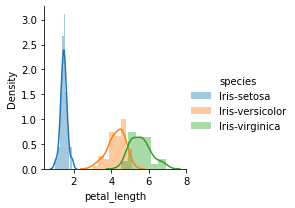

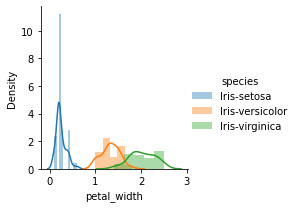

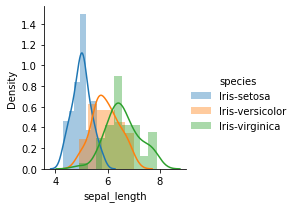

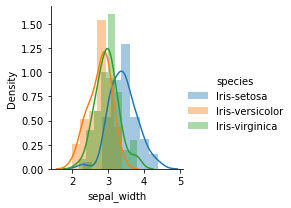

In [6]:
# Explore frequency distribution
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"sepal_length").add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"sepal_width").add_legend()
plt.show()

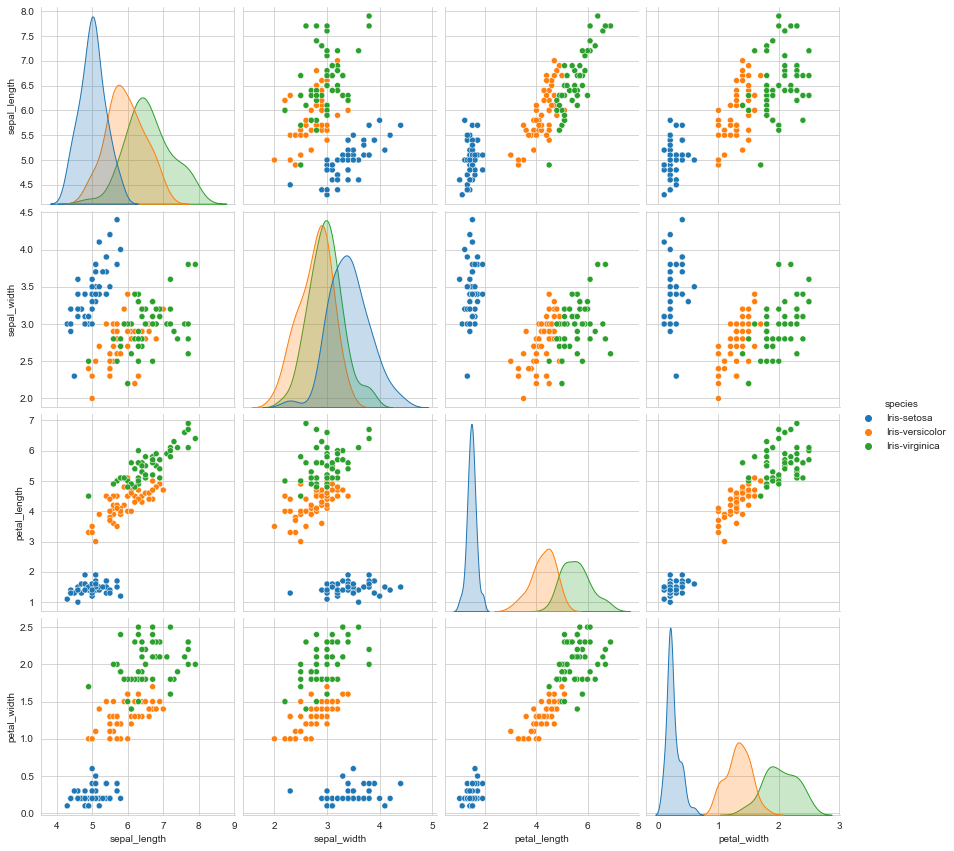

In [7]:
# Explore scattering
sns.set_style("whitegrid")
sns.pairplot(df,hue="species",size=3);
plt.show()

In [8]:
# It seems that the 4 features can be well divided.
# I will use K-means to implement the clustering.
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

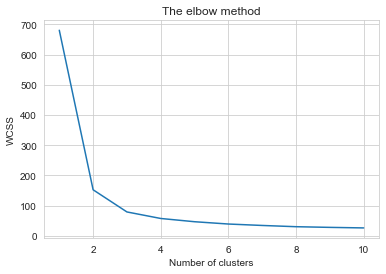

In [9]:
# Find the optimum cluster numbers for K-means.
x = df.iloc[:, [0, 1, 2, 3]].values
wcss = []
# Sum of squares within the cluster.

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

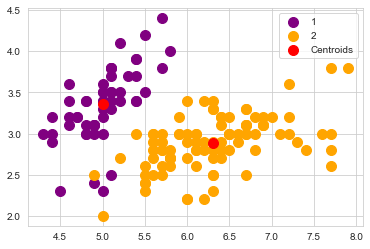

In [10]:
# Using the elbow method to deternine the optimul cluster numbers, the result shows that elbow cluster n=3
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = '1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = '2')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [11]:
kmeans.cluster_centers_

array([[5.00566038, 3.36037736, 1.56226415, 0.28867925],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

In [12]:
# Calculating silhouette coefficient for above clustering
from sklearn import metrics
silhouette_avg = metrics.silhouette_score(x, y_kmeans)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.6808136202936816


In [13]:
# Since -1 is the worst and +1 is the optimal silhouette score,
# 0.681 is an above-average value for silhouette score.

In [15]:
# Labeling the species in the original dataset.
y = df['species'].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [16]:
# The Kmeans score
kmeans_score = metrics.adjusted_rand_score(y,y_kmeans)
kmeans_score

0.5399218294207123

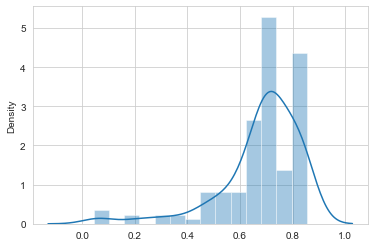

In [17]:
# Now I will dive into the distribution of silhouette metrics to explore more details.
scores = metrics.silhouette_samples(x, y_kmeans)
sns.distplot(scores);

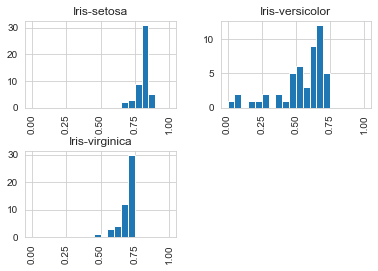

In [20]:
# Explore the distribution of silhouette score for each species.
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Species'] = df['species']
df_scores.hist(by='Species', column='SilhouetteScore', range=(0,1.0), bins=20);

In [21]:
# Now let's explore Guassian Mixture Model.
# I scaled the data at the first place.
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled = pd.DataFrame(x_scaled)
x_scaled.info

<bound method DataFrame.info of             0         1         2         3
0   -0.900681  1.032057 -1.341272 -1.312977
1   -1.143017 -0.124958 -1.341272 -1.312977
2   -1.385353  0.337848 -1.398138 -1.312977
3   -1.506521  0.106445 -1.284407 -1.312977
4   -1.021849  1.263460 -1.341272 -1.312977
..        ...       ...       ...       ...
145  1.038005 -0.124958  0.819624  1.447956
146  0.553333 -1.281972  0.705893  0.922064
147  0.795669 -0.124958  0.819624  1.053537
148  0.432165  0.800654  0.933356  1.447956
149  0.068662 -0.124958  0.762759  0.790591

[150 rows x 4 columns]>

In [23]:
# Try GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(x_scaled)
y_cluster_gmm = gmm.predict(x_scaled)
y_cluster_gmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
# Comparing the GMM prediction with the original labelled species.
gmm_score = metrics.adjusted_rand_score(y,y_cluster_gmm)
gmm_score

0.5681159420289855

In [26]:
# The result shows that GMM behaves really good in clustering the iris species.
# Now I will visualize how GMM behaves in clustering the data.

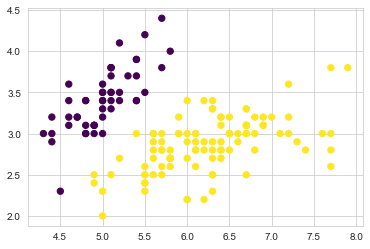

In [27]:
plt.scatter(x[:, 0], x[:, 1], c=y_cluster_gmm, s=40, cmap='viridis');

In [33]:
# The probability of any point belongs to the given cluster.
probs = gmm.predict_proba(x)
print(probs[:5].round(3))

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [34]:
# Now I will apply Principal Component Analysis (PCA) to do some feature reduction.
from sklearn.decomposition import PCA
import matplotlib as mpl
ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=0)
pca.fit(x_scaled)
x_pca_array = pca.transform(x_scaled)
x_pca = pd.DataFrame(x_pca_array,columns=['PC1','PC2'])
x_pca.info
print('2 principal components account for {:.4f}% of the variance.'.format(100 * np.sum(pca.explained_variance_ratio_[:2])))

2 principal components account for 95.8010% of the variance.


In [35]:
df_plot = x_pca.copy()
y_kmeans_pca = kmeans.fit_predict(x_pca)
df_plot['y_kmeans_pca'] = y_kmeans_pca
df_plot['Species_id'] = y
gmm.fit(x_pca)
y_gmm_pca = gmm.predict(x_pca)
df_plot['y_gmm_pca'] = y_gmm_pca
df_plot.info

<bound method DataFrame.info of           PC1       PC2  y_kmeans_pca  Species_id  y_gmm_pca
0   -2.264542  0.505704             0           0          1
1   -2.086426 -0.655405             0           0          1
2   -2.367950 -0.318477             0           0          1
3   -2.304197 -0.575368             0           0          1
4   -2.388777  0.674767             0           0          1
..        ...       ...           ...         ...        ...
145  1.870522  0.382822             1           2          0
146  1.558492 -0.905314             1           2          0
147  1.520845  0.266795             1           2          0
148  1.376391  1.016362             1           2          0
149  0.959299 -0.022284             1           2          0

[150 rows x 5 columns]>

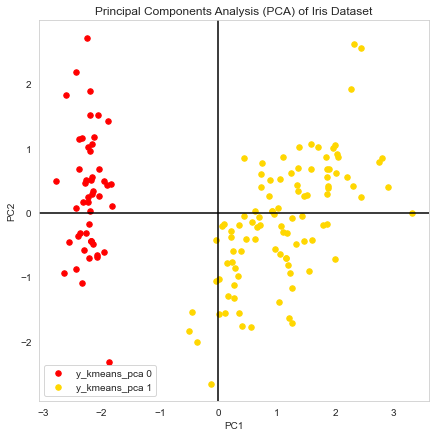

In [36]:
# Now I will visualize the 2d scatterplot.
# Making a scatterplot of the first two principal components of the data, colored by the groupby field.
def plotData(df, groupby):
    fig, ax = plt.subplots(figsize = (7,7))
    cmap = mpl.cm.get_cmap('prism')
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax,
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(3-1)),
                     label = "%s %i" % (groupby, i), 
                     s=30) 
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset")

plotData(df_plot, 'y_kmeans_pca')

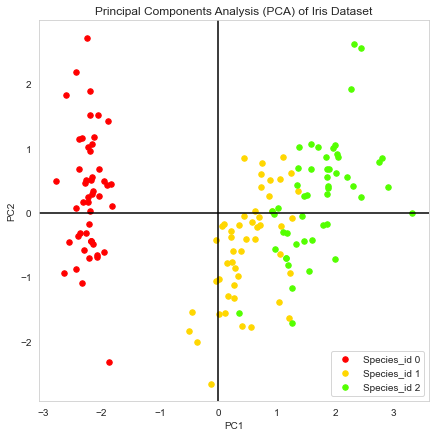

In [37]:
# Above is the predicted k_means species. Then we will visualize the real species.
plotData(df_plot, 'Species_id')

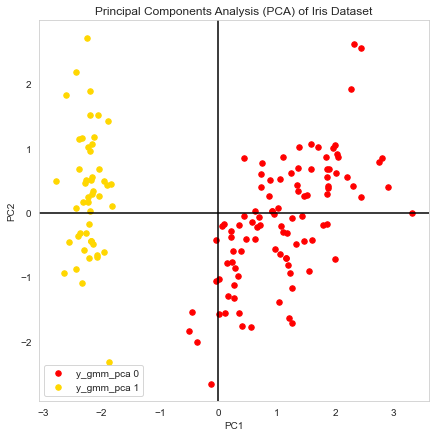

In [38]:
#Then we will visualize the GMM predicted species.
plotData(df_plot, 'y_gmm_pca')

In [39]:
# The GMM score after PCA
gmm_pca_score = metrics.adjusted_rand_score(y,y_gmm_pca)
gmm_pca_score

0.5681159420289855

In [40]:
# The Kmeans score after PCA
kmeans_pca_score = metrics.adjusted_rand_score(y,y_kmeans_pca)
kmeans_pca_score

0.5681159420289855

In [68]:
# Now I will explore ICA.
from sklearn.decomposition import FastICA
ndimensions = 2

ica = FastICA(n_components=ndimensions, whiten=True, random_state=0)
ica.fit(x_scaled)
x_ica_array = ica.transform(x_scaled)
x_ica = pd.DataFrame(x_ica_array,columns=['IC1','IC2'], index=x_scaled.index)
x_ica.info

<bound method DataFrame.info of           IC1       IC2
0    0.106742 -0.046924
1    0.101808  0.052094
2    0.114232  0.022962
3    0.111976  0.044912
4    0.112162 -0.061513
..        ...       ...
145 -0.090641 -0.029296
146 -0.071741  0.079670
147 -0.073559 -0.020040
148 -0.068964 -0.084014
149 -0.045810  0.003560

[150 rows x 2 columns]>

In [69]:
df_plot_2 = x_ica.copy()
y_kmeans_ica = kmeans.fit_predict(x_ica)
df_plot_2['y_kmeans_ica'] = y_kmeans_ica
df_plot_2['Species_id'] = y
gmm.fit(x_ica)
y_gmm_ica = gmm.predict(x_ica)
df_plot_2['y_gmm_ica'] = y_gmm_ica
df_plot_2.info

<bound method DataFrame.info of           IC1       IC2  y_kmeans_ica  Species_id  y_gmm_ica
0    0.106742 -0.046924             0           0          1
1    0.101808  0.052094             0           0          1
2    0.114232  0.022962             0           0          1
3    0.111976  0.044912             0           0          1
4    0.112162 -0.061513             0           0          1
..        ...       ...           ...         ...        ...
145 -0.090641 -0.029296             1           2          0
146 -0.071741  0.079670             1           2          0
147 -0.073559 -0.020040             1           2          0
148 -0.068964 -0.084014             1           2          0
149 -0.045810  0.003560             1           2          0

[150 rows x 5 columns]>

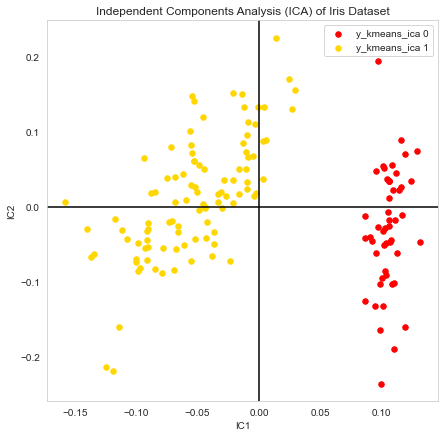

In [70]:
# Now I will visualize the 2d scatterplot of ICA with 2 components.

def plotData(df, groupby):
    fig, ax = plt.subplots(figsize = (7,7))
    cmap = mpl.cm.get_cmap('prism')
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax,
                     kind = 'scatter', 
                     x = 'IC1', y = 'IC2',
                     color = cmap(i/(3-1)),
                     label = "%s %i" % (groupby, i), 
                     s=30) 
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Independent Components Analysis (ICA) of Iris Dataset")

plotData(df_plot_2, 'y_kmeans_ica')

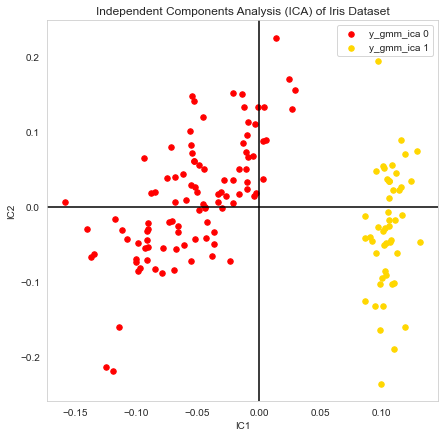

In [71]:
# Now I will visualize the 2d scatterplot of ICA with 2 components.

def plotData(df, groupby):
    fig, ax = plt.subplots(figsize = (7,7))
    cmap = mpl.cm.get_cmap('prism')
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax,
                     kind = 'scatter', 
                     x = 'IC1', y = 'IC2',
                     color = cmap(i/(3-1)),
                     label = "%s %i" % (groupby, i), 
                     s=30) 
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Independent Components Analysis (ICA) of Iris Dataset")

plotData(df_plot_2, 'y_gmm_ica')

In [72]:
# The GMM score after ICA
gmm_ica_score = metrics.adjusted_rand_score(y,y_gmm_ica)
gmm_ica_score

0.5681159420289855

In [73]:
# The Kmeans score after ICA
kmeans_ica_score = metrics.adjusted_rand_score(y,y_kmeans_ica)
kmeans_ica_score

0.5681159420289855

In [77]:
x_kurtosis=x_ica.iloc[:, [0, 1]].values
x_kurtosis

array([[ 1.06741931e-01, -4.69244306e-02],
       [ 1.01807958e-01,  5.20944589e-02],
       [ 1.14231910e-01,  2.29622479e-02],
       [ 1.11975936e-01,  4.49120432e-02],
       [ 1.12161655e-01, -6.15128230e-02],
       [ 9.43366937e-02, -1.32692648e-01],
       [ 1.16737490e-01, -1.05863853e-02],
       [ 1.06070460e-01, -2.49300614e-02],
       [ 1.15386504e-01,  8.90345033e-02],
       [ 1.06059787e-01,  3.43382164e-02],
       [ 1.00164984e-01, -9.47721660e-02],
       [ 1.10818713e-01, -1.75240846e-02],
       [ 1.08557323e-01,  5.64217334e-02],
       [ 1.29142727e-01,  7.51818317e-02],
       [ 9.90130188e-02, -1.64480549e-01],
       [ 9.92732957e-02, -2.35347665e-01],
       [ 1.00674709e-01, -1.32514352e-01],
       [ 1.03158944e-01, -4.75264297e-02],
       [ 8.61671994e-02, -1.24952807e-01],
       [ 1.08334478e-01, -1.02512007e-01],
       [ 9.02359380e-02, -3.99203105e-02],
       [ 1.02498145e-01, -8.48003383e-02],
       [ 1.31165184e-01, -4.64334261e-02],
       [ 8.

In [82]:
import scipy.stats as stats
from scipy.stats import kurtosis
kurtosis(x_kurtosis)

array([-1.35751103,  0.40817096])

In [91]:
# Now I will explore ICA.
from sklearn.decomposition import FastICA
ndimensions = 1

ica = FastICA(n_components=ndimensions, whiten=True, random_state=0)
ica.fit(x_scaled)
x_ica_array = ica.transform(x_scaled)
x_ica_2 = pd.DataFrame(x_ica_array,columns=['IC1'], index=x_scaled.index)
x_ica_2.info

<bound method DataFrame.info of           IC1
0    0.108375
1    0.099850
2    0.113323
3    0.110272
4    0.114320
..        ...
145 -0.089518
146 -0.074585
147 -0.072783
148 -0.065870
149 -0.045909

[150 rows x 1 columns]>

In [92]:
df_plot_3 = x_ica_2.copy()
y_kmeans_ica_2 = kmeans.fit_predict(x_ica_2)
df_plot_3['y_kmeans_ica'] = y_kmeans_ica_2
df_plot_3['Species_id'] = y
gmm.fit(x_ica_2)
y_gmm_ica_2 = gmm.predict(x_ica_2)
df_plot_3['y_gmm_ica'] = y_gmm_ica_2
df_plot_3.info

<bound method DataFrame.info of           IC1  y_kmeans_ica  Species_id  y_gmm_ica
0    0.108375             0           0          1
1    0.099850             0           0          1
2    0.113323             0           0          1
3    0.110272             0           0          1
4    0.114320             0           0          1
..        ...           ...         ...        ...
145 -0.089518             1           2          0
146 -0.074585             1           2          0
147 -0.072783             1           2          0
148 -0.065870             1           2          0
149 -0.045909             1           2          0

[150 rows x 4 columns]>

In [93]:
# The GMM score after ICA
gmm_ica_2_score = metrics.adjusted_rand_score(y,y_gmm_ica_2)
gmm_ica_2_score

0.5681159420289855

In [94]:
# The Kmeans score after ICA
kmeans_ica_2_score = metrics.adjusted_rand_score(y,y_kmeans_ica_2)
kmeans_ica_2_score

0.5681159420289855

In [95]:
x_kurtosis=x_ica_2.iloc[:, [0]].values
kurtosis(x_kurtosis)

array([-1.36766425])

In [90]:
# Now I will explore ICA.
from sklearn.decomposition import FastICA
ndimensions = 3

ica = FastICA(n_components=ndimensions, whiten=True, random_state=0)
ica.fit(x_scaled)
x_ica_array = ica.transform(x_scaled)
x_ica_3 = pd.DataFrame(x_ica_array,columns=['IC1','IC2','IC3'], index=x_scaled.index)
x_ica_3.info

<bound method DataFrame.info of           IC1       IC2       IC3
0    0.112625 -0.033903  0.020851
1    0.106255  0.034081 -0.054438
2    0.107458  0.044800  0.011907
3    0.101670  0.067888  0.007227
4    0.112272 -0.028235  0.054613
..        ...       ...       ...
145 -0.098097 -0.010283  0.047711
146 -0.073879  0.049726 -0.059937
147 -0.078600 -0.008458  0.031893
148 -0.104487  0.027386  0.198484
149 -0.069115  0.056359  0.082516

[150 rows x 3 columns]>

In [98]:
df_plot_4 = x_ica_3.copy()
y_kmeans_ica_3 = kmeans.fit_predict(x_ica_3)
df_plot_4['y_kmeans_ica'] = y_kmeans_ica_3
df_plot_4['Species_id'] = y
gmm.fit(x_ica_3)
y_gmm_ica_3 = gmm.predict(x_ica_3)
df_plot_4['y_gmm_ica'] = y_gmm_ica_3
df_plot_4.info

<bound method DataFrame.info of           IC1       IC2       IC3  y_kmeans_ica  Species_id  y_gmm_ica
0    0.112625 -0.033903  0.020851             1           0          0
1    0.106255  0.034081 -0.054438             1           0          0
2    0.107458  0.044800  0.011907             1           0          0
3    0.101670  0.067888  0.007227             1           0          0
4    0.112272 -0.028235  0.054613             1           0          0
..        ...       ...       ...           ...         ...        ...
145 -0.098097 -0.010283  0.047711             0           2          1
146 -0.073879  0.049726 -0.059937             0           2          1
147 -0.078600 -0.008458  0.031893             0           2          1
148 -0.104487  0.027386  0.198484             0           2          1
149 -0.069115  0.056359  0.082516             0           2          1

[150 rows x 6 columns]>

In [99]:
# The GMM score after ICA
gmm_ica_3_score = metrics.adjusted_rand_score(y,y_gmm_ica_3)
gmm_ica_3_score

0.5681159420289855

In [100]:
# The Kmeans score after ICA
kmeans_ica_3_score = metrics.adjusted_rand_score(y,y_kmeans_ica_3)
kmeans_ica_3_score

0.5681159420289855

In [101]:
x_kurtosis=x_ica_3.iloc[:, [0,1,2]].values
kurtosis(x_kurtosis)

array([-1.42105097,  0.26141283, -0.23252853])